In [3]:
# Importing libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Assigning file to a variable

In [9]:
file = 'FSD.xlsx'
df = pd.read_excel(file)

In [10]:
#Checking the file access by printing columns

In [9]:
print(df.columns.ravel())

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Day', 'Month', 'Year'],
      dtype='object')


---

# 1. fuel price over a year

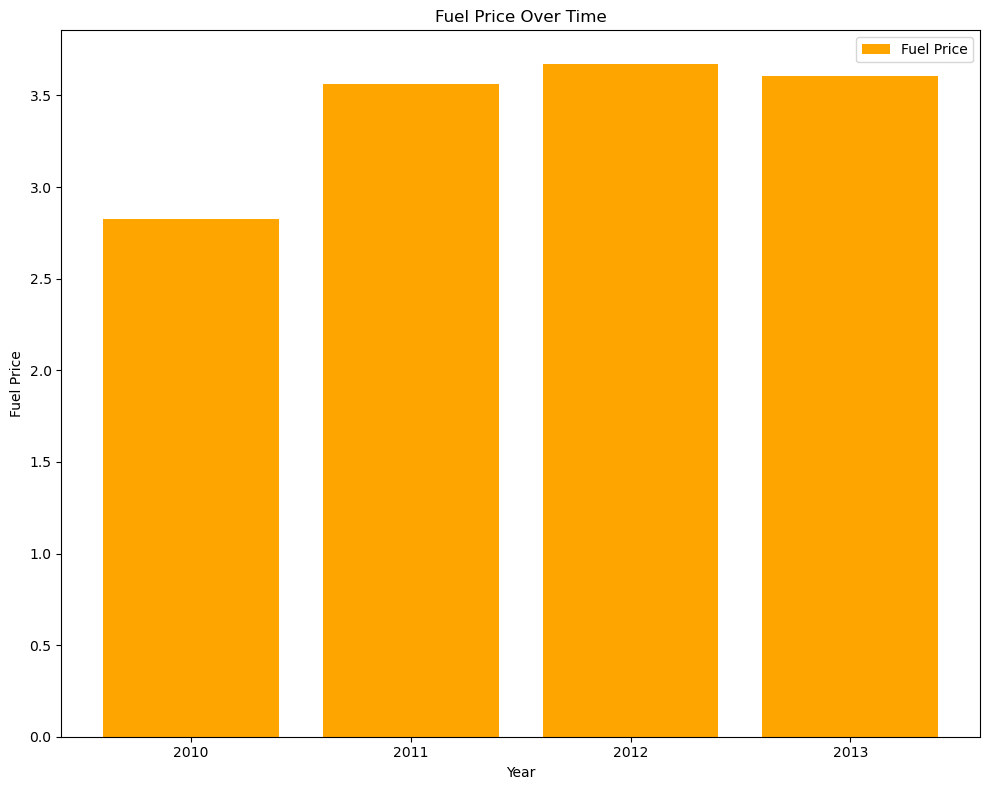

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

file = 'FSD.xlsx'
df = pd.read_excel(file)

df_price = df['Fuel_Price']
df_Year = df['Year']

df_cleaned = df.dropna(subset=['Year', 'Fuel_Price'])

grouped_data = df_cleaned.groupby('Year').agg({'Fuel_Price': 'mean'}).reset_index()

x= grouped_data['Year']
y= grouped_data['Fuel_Price']

plt.figure(figsize = (10,8))
plt.bar(x, y, label='Fuel Price', color='orange')
plt.title('Fuel Price Over Years')
plt.xlabel('Year')
plt.ylabel('Fuel Price')
plt.legend()
plt.xticks(grouped_data['Year'])
plt.tight_layout()
plt.show()

In [ ]:
# Fuel price per year

---

# 2. Fuel price with holiday

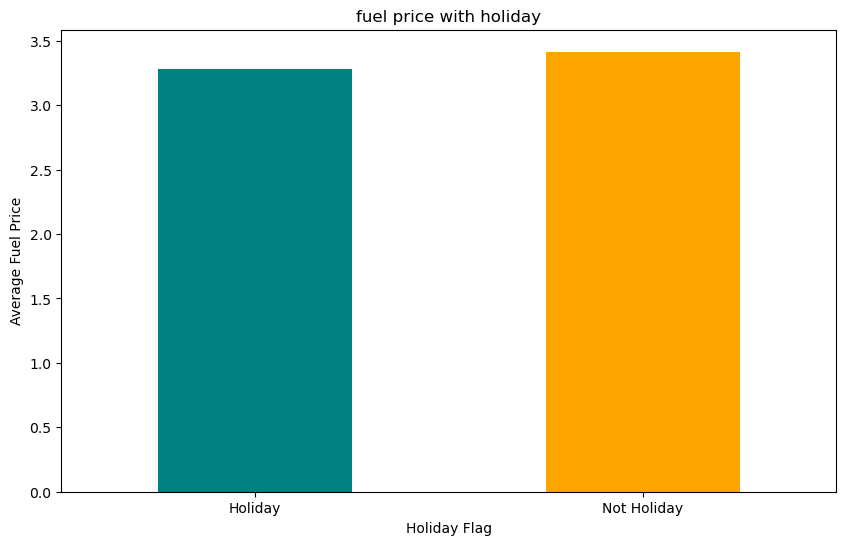

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

file = 'FSD.xlsx'
df = pd.read_excel(file)
df['Holiday_Flag'] = df['IsHoliday'].apply(lambda x : "Holiday" if x else "Not Holiday")

holiday_fuel = df.groupby('Holiday_Flag')['Fuel_Price'].mean()

# Plot a bar graph
plt.figure(figsize=(10, 6))
holiday_fuel.plot(kind='bar', color=['teal', 'orange'])

# Add labels
plt.title('fuel price with holiday')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Fuel Price')
plt.xticks(rotation = 0)
plt.show()

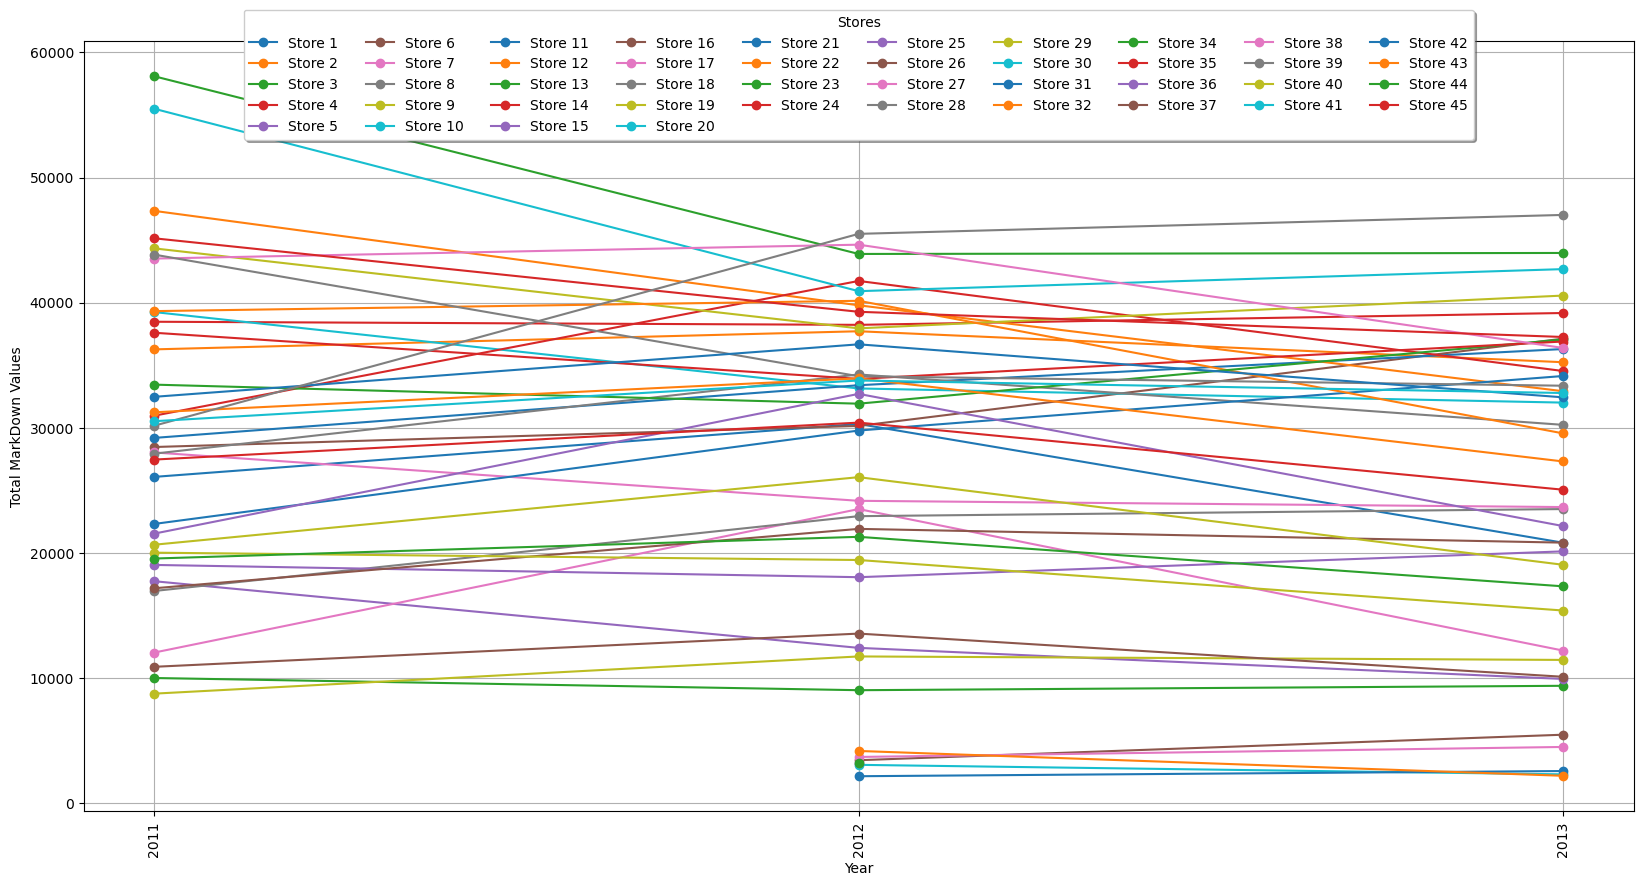

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the dataset
file = 'FSD.csv'
df = pd.read_csv(file)

# Convert 'Store' and 'Year' columns to numeric, coercing errors to NaN
df['Store'] = pd.to_numeric(df['Store'], errors='coerce')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where 'Date' is missing
df_cleaned = df.dropna(subset=['Date']).copy()

# Extract the year from the 'Date' column
df['Year'] = df_cleaned['Date'].dt.year

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# List of MarkDown columns
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Drop rows with NaN in the MarkDown columns, 'Store', or 'Year'
df_cleaned = df.dropna(subset=markdown_columns + ['Store', 'Year'])

# Group by 'Store' and 'Year', and compute the mean of the MarkDown columns
df_grouped = df_cleaned.groupby(['Store', 'Year'])[markdown_columns].mean().reset_index()

# Plot the aggregated MarkDowns for each store over the years
plt.figure(figsize=(20, 10))

# Loop over each store and plot its markdown values over the years
for store in df_grouped['Store'].unique():
    store_data = df_grouped[df_grouped['Store'] == store]
    
    # Plot the total markdown (sum of all markdown columns) for each store
    plt.plot(store_data['Year'], store_data[markdown_columns].sum(axis=1), label=f'Store {int(store)}', marker='o')

# Set plot title and labels
plt.title('MarkDown Values for Each Store Over Years')
plt.xlabel('Year')
plt.ylabel('Total MarkDown Values')

# Rotate x-axis labels to avoid overlap
plt.xticks(df_grouped['Year'].unique(), rotation=90)

# Display the legend and plot
plt.legend(title="Stores", loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=10, fancybox=True, shadow=True)
plt.grid(True)
plt.show()